In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

from utils import ReachFinder

from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 100
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'

In [2]:
G = nx.read_gexf("../../PyPi Network V2.gexf")

print(G)

DiGraph with 169469 nodes and 785388 edges


In [11]:
def get_reach(G: nx.Graph, p: float = 1) -> pd.DataFrame:
    """
    Get reach of each node for a given probability 'p'.

    Args:
        G (nx.Graph): Networkx Graph.
        p (float, optional): Probability 'p'. Defaults to 1.

    Returns:
        pd.DataFrame: DataFrame with reach of each node.
    """

    search = ReachFinder(G, p = p)

    # Find reach of each node.
    reach_by_node = search.find_all_nodes()
    reach_by_node = search.remove_self_edges(reach_by_node)

    # Sort libs by reach descending.
    reach_amount = dict(sorted([(k, len(v)) for k, v in reach_by_node.items()], key = lambda x: x[1], reverse=True))
    reach_df = pd.DataFrame([(k, v) for k, v in reach_amount.items()], columns = ["Library", "Reach"]).set_index("Library")

    return reach_df


In [38]:
probs = np.arange(0, 1.1, 0.1)
np_probs = [get_reach(G, p = p)["Reach"].loc["numpy"] for p in probs]

Done. Function called 169469 times.
Done. Function called 169469 times.
Done. Function called 169469 times.
Done. Function called 169469 times.
Done. Function called 169469 times.
Done. Function called 169469 times.
Done. Function called 169469 times.
Done. Function called 169469 times.
Done. Function called 169469 times.
Done. Function called 169469 times.
Done. Function called 169469 times.


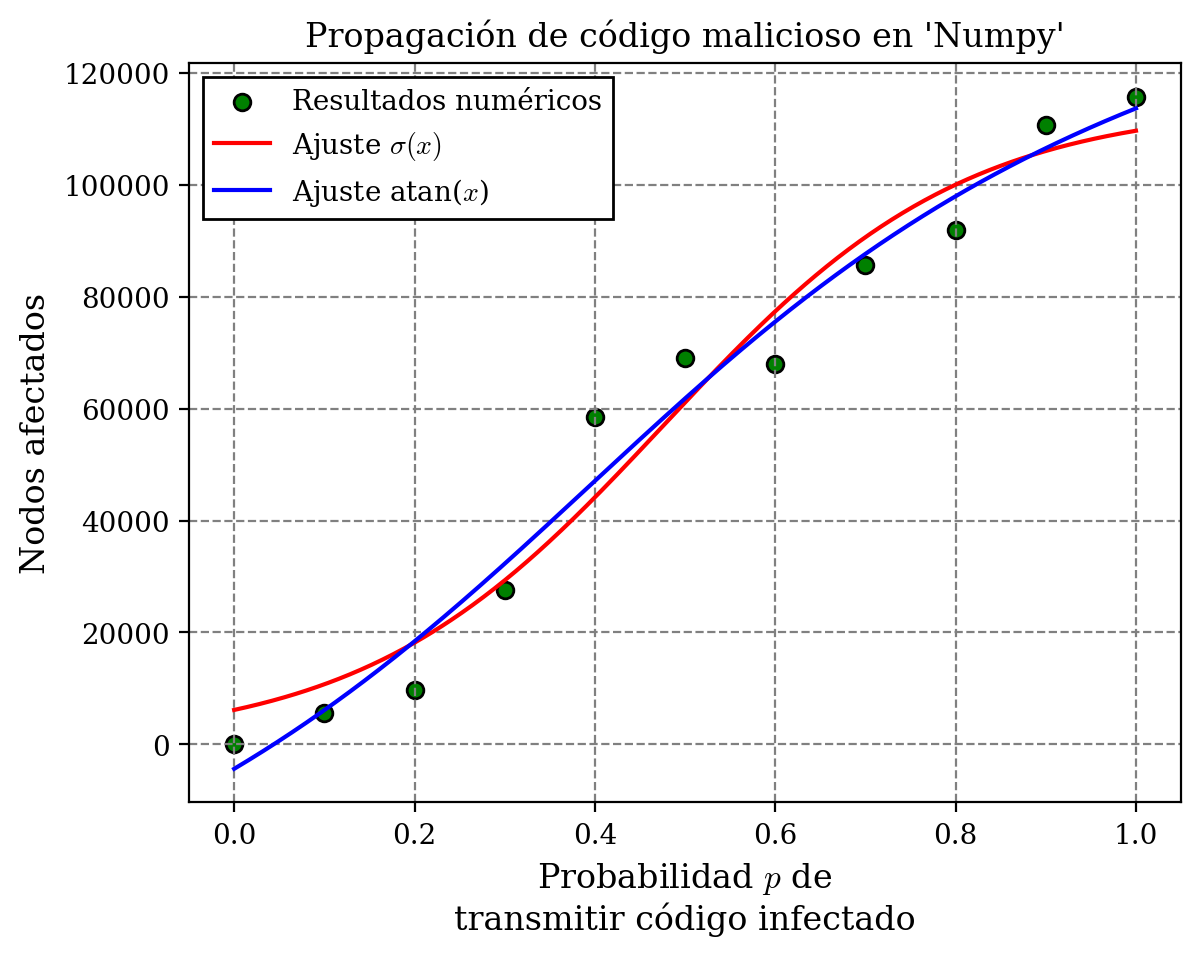

In [40]:
from scipy.optimize import curve_fit

sigmoid = lambda x, a, b, c: a/(1 + np.exp(-b*x - c))
arctan = lambda x, a, b, c, d: a*np.arctan(b*x + c) + d

popt, pcov = curve_fit(sigmoid, probs, np_probs, p0 = [120000, 1, 0.5])
popt2, pcov2 = curve_fit(arctan, probs, np_probs)
p = np.linspace(0, 1, 500)

plt.scatter(probs, np_probs, ec="black", label="Resultados numéricos", color="green")
plt.plot(p, sigmoid(p, *popt), label="Ajuste $\sigma(x)$", color="red")
plt.plot(p, arctan(p, *popt2), label="Ajuste atan($x$)", color="blue")
plt.legend(loc="upper left", fancybox=False, edgecolor="black", framealpha=1)

plt.xlabel(f"Probabilidad $p$ de\ntransmitir código infectado")
plt.ylabel(f"Nodos afectados")
plt.title("Propagación de código malicioso en 'Numpy'")
plt.grid(color="gray", ls="--")